## 18 - Détections d'oiseaux à proximité d'un parc éolien en mer à l'aide de vidéos 360°

Gari ; Romain ; Timothée

#### 1. Extraction des Features

Méthode simple : Utiliser un modèle pré-entraîné de CNN, comme VGG16 ou ResNet, pour extraire les vecteurs de features de chaque image.

Comment faire : Chargeons le modèle en ignorant la couche de classification finale et récupérons les features de la dernière ou de l’avant-dernière couche (généralement un vecteur de 512 à 2048 dimensions).

In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import os
from glob import glob
import cv2

##### Charger le Modèle ResNet50 Sans la Dernière Couche (include_top=False)

Ici, include_top=False signifie qu'on ne chargera pas la dernière couche fully connected de ResNet. Au lieu de cela, on s'arrêtera à la couche juste avant, qui donne un vecteur de 2048 dimensions.

pooling='avg' applique une moyenne sur les features en sortie de la dernière couche convolutive, pour obtenir un vecteur unique de 2048 dimensions (appelé "feature vector").

In [2]:
# Charger ResNet50 sans la couche de classification
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

#### Définir une Fonction pour l'Extraction des Features à partir d'une Image

Cette fonction prend le chemin d'une image en entrée, la redimensionne à la taille de ResNet50 (224x224 pixels), la transforme en tableau numpy, et applique le prétraitement preprocess_input.

preprocess_input normalise les pixels de l'image comme attendu par ResNet50, ce qui améliore les performances et la précision des features extraites.

Enfin, on passe l'image prétraitée dans le modèle pour obtenir le vecteur de 2048 dimensions.

In [3]:
def extract_features(img_path, model):
    # Charger l'image et la redimensionner à 224x224 pixels
    img = image.load_img(img_path, target_size=(224, 224))
    # Convertir l'image en un tableau numpy
    x = image.img_to_array(img)
    # Ajouter une dimension (pour représenter le batch de 1 image)
    x = np.expand_dims(x, axis=0)
    # Prétraiter l'image pour ResNet
    x = preprocess_input(x)
    # Passer l'image dans le modèle pour extraire les features
    features = model.predict(x)
    # Aplatir le vecteur de sortie (c'est déjà un vecteur de 2048, donc facultatif ici)
    return features.flatten()


#### Extraction des Features pour un Lot d'Images

On va utiliser une boucle pour appliquer notre fonction extract_features sur chaque image et obtenir un ensemble de vecteurs de caractéristiques.

On utilise glob pour obtenir une liste des chemins de toutes les images dans le dossier.

In [23]:
# Chemin vers le dossier d'images
image_paths = glob("../../DATASET_SENSEA/images/*.jpg")    # Le .jpg à la fin permet de prendre uniquement les photos et pas les autres fichiers

# Initialiser une liste pour stocker tous les vecteurs de features
features_list = []

i = 0 

o = 0

N = 37 # Pour diminuer le temps d'exécution, on ne traite pas toutes les images (on prend une image sur 100)

# Boucler sur chaque image et extraire les features
for img_path in image_paths:
    if i%N == o :
        features = extract_features(img_path, model)
        features_list.append(features)
    i += 1

# Convertir la liste en un tableau numpy pour faciliter l'analyse
features_array = np.array(features_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

##### Résumé

À ce stade, features_array contient un tableau où chaque ligne est le vecteur de caractéristiques d'une image (de 2048 dimensions pour ResNet50).

Ce code extrait des vecteurs de 2048 dimensions pour chaque image de l'océan. Ces vecteurs contiennent des informations essentielles sur les motifs, couleurs, et textures de chaque image, en fonction de ce que ResNet50 a appris sur des millions d'images d'ImageNet.

Ces vecteurs de features peuvent maintenant être utilisés pour le clustering avec K-Means ou d'autres algorithmes de clustering.

#### 2. Réduction

Passons à la réduction de dimension avec l'algorithme PCA (Principal Component Analysis). L'objectif est de réduire les dimensions de nos vecteurs de caractéristiques (features) extraits avec ResNet50 (d'une taille de 2048) pour simplifier l’analyse et le clustering, tout en gardant le maximum d’information possible.

Avec PCA, on doit choisir le nombre de composantes principales, c’est-à-dire combien de dimensions on souhaite conserver après la réduction. Une approche courante consiste à conserver 90-95 % de la variance des données, ce qui assure qu’on conserve la majorité des informations importantes

In [24]:
from sklearn.decomposition import PCA

# Supposons que `features_array` soit le tableau de features de 2048 dimensions (chaque ligne est un vecteur de features pour une image)
# Vérifions sa taille pour être sûr
print(features_array.shape)  # Par exemple, (num_images, 2048)

# On applique PCA pour réduire à un nombre de dimensions réduit, ici 50 pour l'exemple
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(features_array)


# Affichage des dimensions après réduction
print(reduced_features.shape)  # Par exemple, (num_images, 50)

(557, 2048)
(557, 50)


#### 3. Clustering avec K-means

Implémenter la Méthode du Coude

La méthode du coude consiste à appliquer K-means plusieurs fois en augmentant progressivement le nombre de clusters et à observer la variation de l’inertie (ou la somme des distances au carré entre chaque point et son centre de cluster). On choisit le nombre de clusters à l’endroit où la diminution de l’inertie ralentit, formant un "coude".

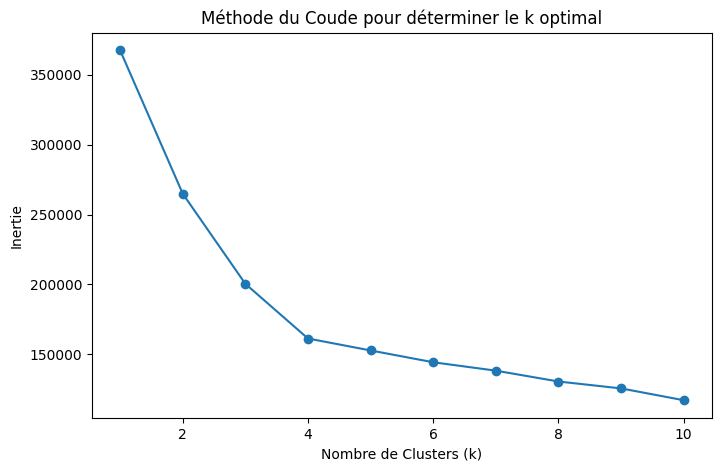

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker les inerties
inertias = []

# Tester K-means pour différents nombres de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(reduced_features)
    inertias.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour déterminer le k optimal')
plt.show()

Appliquons K-means avec le Nombre Optimal de Clusters

In [27]:
# Choisir le nombre optimal de clusters (exemple avec k=5)
k_optimal = 5

# Appliquer K-means
kmeans = KMeans(n_clusters=k_optimal, random_state=0)
labels_kmeans = kmeans.fit_predict(reduced_features)

# Afficher les étiquettes des clusters pour chaque image
print(labels_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 1 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 4 4 3 3 2 2 2 2 0 0 0 0 3 3 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 2 2 1 4 4 4 4 4 4 4
 4 1 1 1 1 3 1 1 1 1 3 3 3 3 3 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 4 4 4 4 4 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 2
 2 3 0 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 4 4 4 4 1 1 1 1 3 3 1 3 3 3 3
 2 2 0 0 1 1 1 1 0 0 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 1 1 4
 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 2 2 2 2 1 1 1 1 1 1 1 1
 3 3 3 3 3 3 3 3 0 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 4 4
 4 2 4 4 4 0 0 2 2 2 2 1 1 1 1 2 2 2 2 3 3 3 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4
 0 0 0 0 0 0 0 0 3 3 3 3 

Résultats des Clusters

Chaque image est maintenant associée à un numéro de cluster dans labels. On peut utiliser ces étiquettes pour regrouper les images selon les conditions météorologiques détectées, ou d'autres caractéristiques visuelles similaires.

On affiche désormais quelques photos au hasard avec leur label, pour vérifier manuellement que ça a bien marché

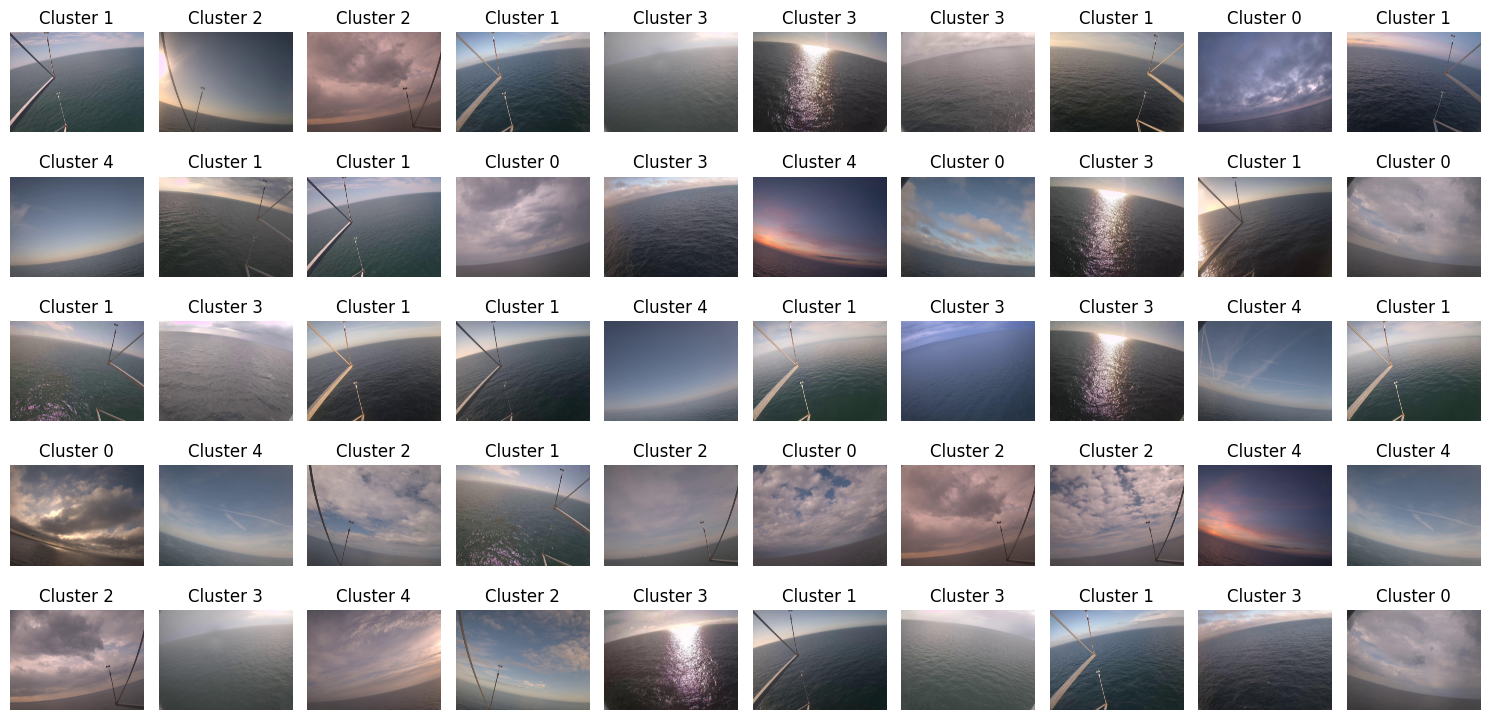

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def afficher_photos_aleatoires(images, labels_kmeans, num_photos=50):
    """
    Affiche un ensemble de photos choisies aléatoirement avec leurs étiquettes de cluster.

    Paramètres :
    - images : liste ou tableau contenant les images (chaque image est un tableau).
    - labels : tableau des étiquettes de cluster correspondant à chaque image.
    - num_photos : nombre de photos à afficher (défaut 50).
    """
    # Sélectionne des indices aléatoires
    indices = np.random.choice(len(images), num_photos, replace=False)

    # Paramètres pour l'affichage
    nb_colonnes = 10  # Nombre de colonnes de l'affichage
    nb_lignes = num_photos // nb_colonnes + (num_photos % nb_colonnes > 0)

    # Crée une figure pour afficher les images
    plt.figure(figsize=(15, nb_lignes * 1.5))

    for i, idx in enumerate(indices):
        plt.subplot(nb_lignes, nb_colonnes, i + 1)
        plt.imshow(images[idx])  # Affiche l'image
        plt.title(f'Cluster {labels_kmeans[idx]}')  # Affiche l'étiquette
        plt.axis('off')  # Cache les axes pour une meilleure visibilité

    plt.tight_layout()
    plt.show()

# Utilisation :
# Supposons que `images` contient toutes les images et `labels` les étiquettes de cluster
# afficher_photos_aleatoires(images, labels)

images_un_sur_N = [image.load_img(img_path) for img_path in image_paths[::N]]

afficher_photos_aleatoires(images_un_sur_N, labels_kmeans)


On remarque un problème :
Le clustering différencie les phtos prises avec la caméra orientée vers le bas et celle vers le haut (normal).

Il faudrait pouvoir regrouper les photos de la caméra du haut et du bas où la météo est la même.

On pourrait résoudre ce problème manuellement en mélangeant les clusters qui se ressemblent visuellement.

4. Caractérisation avec OpenCV

L'objectif est donc maintenant de caractériser les différents clusters obtenus selon des paramètres météorologiques tangibles et mesurables. Ainsi, nous allons commencer avec des mesures de niveaux de gris et de couleurs pour classifier selon la luminostié de l'image, qui témoigne globalement de l'ensoleillement sur la photo.

In [29]:
cluster_luminosities = []
for cluster_id in range(k_optimal):
    #Liste des images par clusters
    cluster_images = [images_un_sur_N[i] for i in range(len(labels_kmeans)) if labels_kmeans[i] == cluster_id]
    #Liste de la luminosité moyenne de chaque image
    mean_luminosities = [np.mean(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)) for img in cluster_images]
    #Obtention de la luminosité moyenne du cluster
    cluster_luminosities.append(np.mean(mean_luminosities))

# Affichage des valeurs de luminosité moyenne
for i in range(k_optimal) : 
    print ("Luminosité du cluster", i, " : ", cluster_luminosities[i])

Luminosité du cluster 0  :  121.78747384366123
Luminosité du cluster 1  :  108.63847388712566
Luminosité du cluster 2  :  126.06928542422929
Luminosité du cluster 3  :  105.17485713541666
Luminosité du cluster 4  :  120.03856406096673


On obtient donc les valeurs moyennes de la luminosité des clusters, qui témoigne de l'ensoleillement global.
Tout d'abord, on observe deux groupes distincts un plus clair comportant les images provenant de caméra supérieure et les plus sombres aux images provenant des caméras inférieures

Cela s'explique par le fait que le ciel et le soleil sont très peu présent sur les photos inférieures. Ainsi on peut considérer le cluster 4 comme le cluster le plus lumineux, mais le cluster 1 contient des images qui paraissent parfois plus claires que celles du cluster 0 par exemple

La luminosité ne suffit donc pas à elle seule a caractériser précisement les clusters, c'est pourquoi nous allons également considérer le flou et le contraste qui peuvent de témoigner de différents facteurs tels que l'humidité, la présence de nuages, de pluie ...

In [30]:
def calculer_flou(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return laplacian_var

# Calculer le niveau de flou moyen pour chaque cluster
cluster_flou = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [images_un_sur_N[i] for i in range(len(labels_kmeans)) if labels_kmeans[i] == cluster_id]
    # Calculer le niveau de flou pour chaque image du cluster
    flous = [calculer_flou(img) for img in cluster_images]
    # Ajouter le niveau de flou moyen du cluster à la liste
    cluster_flou.append(np.mean(flous) if flous else 0)

for i in range(k_optimal) : 
    print ("Niveau de flou du cluster", i, " : ", cluster_flou[i])

Niveau de flou du cluster 0  :  6.305814382658929
Niveau de flou du cluster 1  :  184.20378459201058
Niveau de flou du cluster 2  :  7.120128452523789
Niveau de flou du cluster 3  :  344.05615155176156
Niveau de flou du cluster 4  :  33.10307287516247


On observe encore une fois de grosse diparité entre photos inférieures et supérieures, mais on peut aussi noter des écarts notables au sein de deux sous catégories
- Le cluster 0, ou on apercoit le soleil assez bas dans le ciel, avec de nombreux nuages assez sombres, semble plus flou que le cluster 2 qui indique plutôt des ciels dégagés et clairs, surement moins propices aux intempéries et à la brume
- Le cluster 3 comporte les mêmes caractéristiques que le cluster 0, et est donc plus "flou" en moyenne que le cluster 1

In [31]:
def calculer_contraste(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    contrast = np.std(gray_image)  # Écart type des intensités
    return contrast

# Calculer le contraste moyen pour chaque cluster
cluster_contraste = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [images_un_sur_N[i] for i in range(len(labels_kmeans)) if labels_kmeans[i] == cluster_id]
    # Calculer le contraste pour chaque image du cluster
    contrastes = [calculer_contraste(img) for img in cluster_images]
    # Ajouter le contraste moyen du cluster à la liste
    cluster_contraste.append(np.mean(contrastes) if contrastes else 0)

for i in range (k_optimal) : 
    print ("Niveau de contraste du cluster ", i, " : ", cluster_contraste[i])

Niveau de contraste du cluster  0  :  31.284755852521556
Niveau de contraste du cluster  1  :  50.42422737025159
Niveau de contraste du cluster  2  :  31.395217487722128
Niveau de contraste du cluster  3  :  51.29184472284124
Niveau de contraste du cluster  4  :  34.15340845239731


Là encore on observe des disparités au sein des deux groupes de photos, mais on peut noter que le cluster 0 est encore plus contrasté que les clusters 2 et 4, synonyme de ciel ou le soleil se fait plus rare et peine à percer les nuages, indices relevant plutôt d'un temps moins bon, avec une moins bonne visibilité et un risque supérieur d'intempéries

Il serait maintenant cohérent de regrouper ensemble de photos supérieures et inférieures pour pouvoir les caractériser plus facilement, et on peut aussi noter que les photos supérieures sont plus riches en informations car le ciel donne plus d'indications sur la météo que la mer